In [11]:
from MDAnalysis import Universe
import pandas as pd
import numpy as np

from marching_cubes import march
from seaborn import kdeplot
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.graph_objs as go

import meshplex

import fresnel

from scipy.spatial import Delaunay

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from scipy.spatial.distance import cdist,pdist,squareform

from skimage import measure

In [7]:
def golden_spiral(num_pts, radius):
    if radius==0:
        return np.array([[0,0,0]])
    indices = np.arange(0, num_pts, dtype=float) + 0.5
    phi = np.arccos(1 - 2*indices/num_pts)
    theta = np.pi * (1 + 5**0.5) * indices
    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi);
    points = np.vstack([x,y,z]).T
    return points*radius

def plotly_scatter(pointsets, sizes):
    data = []
    for p, s in zip(pointsets, sizes):
        a,b,c = p[:,0], p[:,1], p[:,2]
        trace = go.Scatter3d(x=a, y=b, z=c, mode='markers', marker={'size': s,'opacity': 0.8,})
        data.append(trace)
    layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
    plot_figure = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(plot_figure)
    
def fresnel_mesh(vol, cutoff, n_samples=10, view=None, spacing=(1,1,1)):
    if view is not None:
        view = view
    else:
        view='front'
    #vert, norm, faces = march(vol, smooth) 
    vert, faces, norm, values= measure.marching_cubes_lewiner(vol, cutoff,spacing=(1,1,1))
    scene1 = fresnel.Scene()
    geom = fresnel.geometry.Mesh(scene1,vertices=vert[faces].reshape(-1,3),N=1)
    geom.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
    scene1.camera = fresnel.camera.fit(scene1,view=view, margin=0)
    scene1.lights = fresnel.light.cloudy()
    return fresnel.pathtrace(scene1, samples=n_samples, h=600, w=600)

In [76]:
stamp = golden_spiral(200, 1)
atom_centres = np.random.uniform(0,5,(20,3))
surface_points = (stamp + atom_centres[:,None]).reshape(-1,3)
normals = surface_points.copy()

distances = cdist(surface_points, atom_centres)
mask = distances.min(1)>=1-0.001
surface_points = surface_points[mask]
normals = normals[mask]

# It is possible to do a Delaunay triangulation and then remove faces that are either too long or too far away from the atom centres:

But it's really hard to get right using a naive approach. 

In [77]:

import meshplex
tetra = Delaunay(surface_points)
node_coords = surface_points.copy()
cells = tetra.simplices
mesh = meshplex.MeshTetra(node_coords, cells)
mesh.create_cell_face_relationships()

Selecting triangles that have less than a certain distance to an atom centre, indicating they are probably a surface face:

In [98]:
face_centers = surface_points[mesh.faces['nodes']].mean(1)
facemask = cdist(face_centers, atom_centres).min(1)<1.0

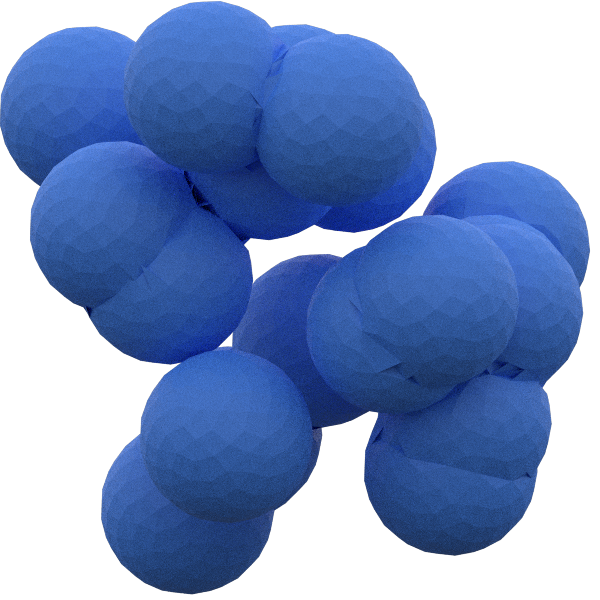

In [100]:

scene1 = fresnel.Scene()
geom = fresnel.geometry.Mesh(scene1,vertices=surface_points[mesh.faces['nodes'][facemask]].reshape(-1,3),N=1)
geom.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene1.camera = fresnel.camera.fit(scene1,view='front', margin=0)
scene1.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene1, samples=200, h=600, w=600)

Selecting triangles who have short sides (and thus are more likely to be a surface face):

In [84]:
triangles = surface_points[mesh.faces['nodes']]
sizemask = np.zeros(triangles.shape[0]).astype(bool)
for i in range(triangles.shape[0]):
    triangle = triangles[i,:,:]
    if squareform(pdist(triangle)).max()<0.565:
        sizemask[i]=True

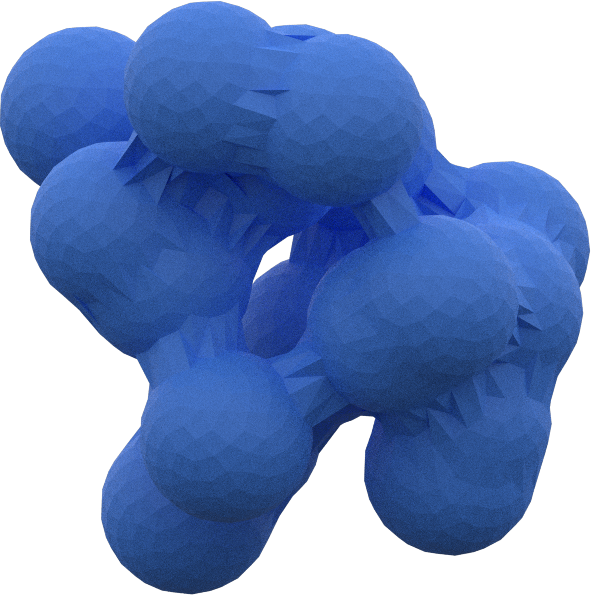

In [85]:
scene1 = fresnel.Scene()
geom = fresnel.geometry.Mesh(scene1,vertices=triangles[sizemask].reshape(-1,3),N=1)
geom.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene1.camera = fresnel.camera.fit(scene1,view='front', margin=0)
scene1.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene1, samples=200, h=600, w=600)

In [227]:
from csg.core import CSG

cube = CSG.cube();
sphere = CSG.sphere(center=[0,0,0], radius=1);
polygons = cube.subtract(sphere).toPolygons();
out=cube.union(sphere)

In [228]:
out = out.refine()

In [229]:
a=out.toVerticesAndPolygons()

In [230]:
np.array(a[0])

array([[-1.        ,  0.94404504,  1.        ],
       [-1.        ,  0.97202252,  1.        ],
       [-1.        ,  0.98134835,  0.88939288],
       ...,
       [-0.71486572, -0.36413762,  1.        ],
       [-0.20710678, -0.79289322,  1.        ],
       [ 0.        , -0.40054382,  1.        ]])

In [232]:
[len(i) for i in a[1]]

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [182]:
for vec in pol[0].vertices:
    coords = vec.pos

In [193]:
points = list()
for i in pol:
    vert = i.vertices
    for vec in vert:
        pos = np.array(vec.pos.unit())
        points.append(vec)

In [204]:
for polygon in pol:
    vertices = polygon.vertices
    print(len(vertices))
    pass

3
4
4
4
4
3
3
3
3
4
4
4
4
3
3
3
4
3
4
6
4
4
5
3
3
4
3
3
6
5
5
3
4
4
5
4
3
3
5
4
6
3
5
3
5
5
4
3
3
4
3
3
4
3
3
4
3
3
7
4
4
3
3
4
3
4
4
6
3
4
3
4
6
3
5
3
5
5
3
5
3
3
5
4
6
3
5
4
3
4
3
3
3
4
3
3
4
3
4
3
3
3
4
3
3
3
3
4
4
4
3
3
3
3
3
3
4
4
4
3
3
3
3
3
5
4
3
4
6
4
5
3
4
3
4
3
3
6
5
5
3
4
4
5
4
3
3
5
4
6
3
5
3
5
5
3
4
4
3
3
3
3
4
4
3
3
3
3
6
4
4
5
3
3
4
3
3
6
5
5
3
4
4
5
4
3
3
5
4
6
3
5
3
5
5


In [207]:
import meshzoo
points, cells = meshzoo.icosa_sphere(10)

In [212]:
plotly_scatter([points], [5])

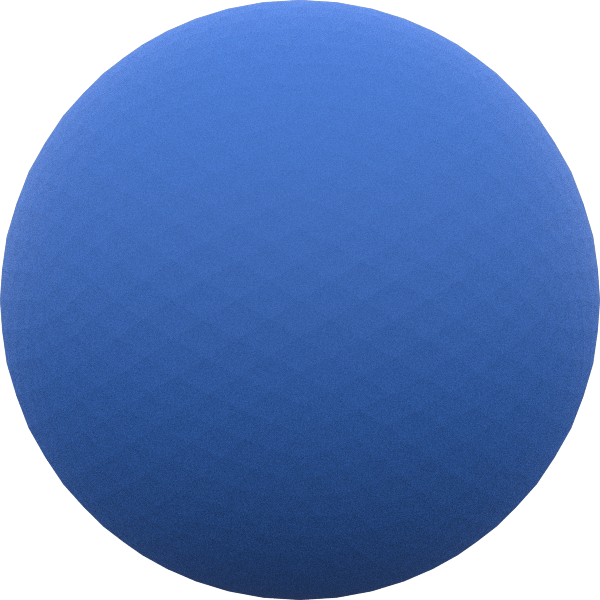

In [210]:
scene1 = fresnel.Scene()
geom = fresnel.geometry.Mesh(scene1,vertices=points[cells].reshape(-1,3),N=1)
geom.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene1.camera = fresnel.camera.fit(scene1,view='front', margin=0)
scene1.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene1, samples=200, h=600, w=600)

In [202]:
polygon.vertices

[Vector(-0.99, -0.72, 1.00),
 Vector(-0.41, -0.78, 1.00),
 Vector(-0.00, -0.80, 1.00),
 Vector(0.00, 0.00, 1.00),
 Vector(-0.44, -0.01, 1.00)]

In [180]:
np.array(vec.pos)

array([-1.        ,  0.94404504,  1.        ])

In [161]:
[i.units.x for i in p.vertices]

AttributeError: 'Vertex' object has no attribute 'units'

In [159]:
pol

[Polygon([Vector(-1.00, 0.94, 1.00), Vector(-1.00, 1.00, 1.00), Vector(-1.00, 1.00, 0.67), ]),
 Polygon([Vector(-1.00, 0.84, 1.00), Vector(-1.00, 0.94, 1.00), Vector(-1.00, 1.00, 0.67), Vector(-1.00, 1.00, 0.20), ]),
 Polygon([Vector(-1.00, 0.76, 1.00), Vector(-1.00, 0.84, 1.00), Vector(-1.00, 1.00, 0.20), Vector(-1.00, 1.00, -0.20), ]),
 Polygon([Vector(-1.00, 0.72, 1.00), Vector(-1.00, 0.76, 1.00), Vector(-1.00, 1.00, -0.20), Vector(-1.00, 1.00, -0.67), ]),
 Polygon([Vector(-1.00, 0.72, 1.00), Vector(-1.00, 1.00, -0.67), Vector(-1.00, 1.00, -1.00), Vector(-1.00, 0.94, -1.00), ]),
 Polygon([Vector(-1.00, 0.78, 0.41), Vector(-1.00, 0.94, -1.00), Vector(-1.00, 0.84, -1.00), ]),
 Polygon([Vector(-1.00, 0.80, -0.00), Vector(-1.00, 0.84, -1.00), Vector(-1.00, 0.76, -1.00), ]),
 Polygon([Vector(-1.00, 0.78, -0.41), Vector(-1.00, 0.76, -1.00), Vector(-1.00, 0.72, -1.00), ]),
 Polygon([Vector(-1.00, -1.00, 0.67), Vector(-1.00, -1.00, 1.00), Vector(-1.00, -0.94, 1.00), ]),
 Polygon([Vector(-1.

In [167]:
v = p.vertices[0]

Polygon([Vector(-1.00, 0.94, 1.00), Vector(-1.00, 1.00, 1.00), Vector(-1.00, 1.00, 0.67), ])

In [168]:
p.vertices

[Vector(-1.00, 0.94, 1.00),
 Vector(-1.00, 1.00, 1.00),
 Vector(-1.00, 1.00, 0.67)]

In [166]:
[(v.pos[0], v.pos[1], v.pos[2] for v in vector.vertices]

SyntaxError: invalid syntax (<ipython-input-166-e8bb55fdff6d>, line 1)

In [198]:

f = open('test.obj', 'w')
for v in surface_points:
    f.write('v '+str(v[0])+' '+str(v[1])+' '+str(v[2])+'\n')
    
for v in mesh.faces['nodes']:
    f.write('vn '+str(v[0])+' '+str(v[1])+' '+str(v[2])+'\n')
f.close()

In [180]:
plotly_scatter([surface_points], [10])

In [181]:
from scipy.spatial import Delaunay
import numpy as np
from collections import defaultdict

def alpha_shape_3D(pos, alpha):
    """
    Compute the alpha shape (concave hull) of a set of 3D points.
    Parameters:
        pos - np.array of shape (n,3) points.
        alpha - alpha value.
    return
        outer surface vertex indices, edge indices, and triangle indices
    """

    tetra = Delaunay(pos)
    node_coords = pos.copy()
    cells=tetra.simplices
    r = mesh.cell_circumradius
#     # Find radius of the circumsphere.
#     # By definition, radius of the sphere fitting inside the tetrahedral needs 
#     # to be smaller than alpha value
#     # http://mathworld.wolfram.com/Circumsphere.html
#     tetrapos = np.take(pos,tetra.vertices,axis=0)
#     normsq = np.sum(tetrapos**2,axis=2)[:,:,None]
#     ones = np.ones((tetrapos.shape[0],tetrapos.shape[1],1))
#     a = np.linalg.det(np.concatenate((tetrapos,ones),axis=2))
#     Dx = np.linalg.det(np.concatenate((normsq,tetrapos[:,:,[1,2]],ones),axis=2))
#     Dy = -np.linalg.det(np.concatenate((normsq,tetrapos[:,:,[0,2]],ones),axis=2))
#     Dz = np.linalg.det(np.concatenate((normsq,tetrapos[:,:,[0,1]],ones),axis=2))
#     c = np.linalg.det(np.concatenate((normsq,tetrapos),axis=2))
#     r = np.sqrt(Dx**2+Dy**2+Dz**2-4*a*c)/(2*np.abs(a))

    # Find tetrahedrals
    tetras = tetra.vertices[r<alpha,:]
    # triangles
    TriComb = np.array([(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)])
    Triangles = tetras[:,TriComb].reshape(-1,3)
    Triangles = np.sort(Triangles,axis=1)
    # Remove triangles that occurs twice, because they are within shapes
    TrianglesDict = defaultdict(int)
    for tri in Triangles:TrianglesDict[tuple(tri)] += 1
    Triangles=np.array([tri for tri in TrianglesDict if TrianglesDict[tri] ==1])
    #edges
    EdgeComb=np.array([(0, 1), (0, 2), (1, 2)])
    Edges=Triangles[:,EdgeComb].reshape(-1,2)
    Edges=np.sort(Edges,axis=1)
    Edges=np.unique(Edges,axis=0)

    Vertices = np.unique(Edges)
    return Vertices,Edges,Triangles



In [185]:
verts, edges, tris = alpha_shape_3D(surface_points, 10)

In [ ]:
mesh.create_cell_face_relationships()

In [187]:
plotly_scatter([surface_points,surface_points[verts]], [10,2])

In [9]:
import pygmsh
import numpy as np

geom = pygmsh.built_in.Geometry()

# Draw a cross.
poly = geom.add_polygon([
    [ 0.0,  0.5, 0.0],
    [-0.1,  0.1, 0.0],
    [-0.5,  0.0, 0.0],
    [-0.1, -0.1, 0.0],
    [ 0.0, -0.5, 0.0],
    [ 0.1, -0.1, 0.0],
    [ 0.5,  0.0, 0.0],
    [ 0.1,  0.1, 0.0]
    ],
    lcar=0.05
)

axis = [0, 0, 1]

geom.extrude(
    poly,
    translation_axis=axis,
    rotation_axis=axis,
    point_on_axis=[0, 0, 0],
    angle=2.0 / 6.0 * np.pi
)

mesh = pygmsh.generate_mesh(geom)

Info    : Running 'gmsh -3 /var/folders/1k/ppzhvkpx7pjg4jnc26qbz_4m0000gp/T/tmpwzkg2q9g.geo -format msh -bin -o /var/folders/1k/ppzhvkpx7pjg4jnc26qbz_4m0000gp/T/tmp78z_a345.msh' [Gmsh 4.5.4-git-5a16799, 1 node, max. 1 thread]
Info    : Started on Thu Mar 19 09:38:45 2020
Info    : Reading '/var/folders/1k/ppzhvkpx7pjg4jnc26qbz_4m0000gp/T/tmpwzkg2q9g.geo'...
Info    : Done reading '/var/folders/1k/ppzhvkpx7pjg4jnc26qbz_4m0000gp/T/tmpwzkg2q9g.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 20 %] Meshing curve 4 (Line)
Info    : [ 20 %] Meshing curve 5 (Line)
Info    : [ 30 %] Meshing curve 6 (Line)
Info    : [ 30 %] Meshing curve 7 (Line)
Info    : [ 30 %] Meshing curve 8 (Line)
Info    : [ 40 %] Meshing curve 12 (Line)
Info    : [ 40 %] Meshing curve 13 (Line)
Info    : [ 50 %] Meshing curve 14 (Line)
Info    : [ 50 %] Meshing curve 15 (Line)
Info    : [ 50 %] Meshing curv

In [10]:
mesh.cells


[CellBlock(type='vertex', data=array([[0]])),
 CellBlock(type='vertex', data=array([[1]])),
 CellBlock(type='vertex', data=array([[2]])),
 CellBlock(type='vertex', data=array([[3]])),
 CellBlock(type='vertex', data=array([[4]])),
 CellBlock(type='vertex', data=array([[5]])),
 CellBlock(type='vertex', data=array([[6]])),
 CellBlock(type='vertex', data=array([[7]])),
 CellBlock(type='vertex', data=array([[8]])),
 CellBlock(type='vertex', data=array([[9]])),
 CellBlock(type='vertex', data=array([[10]])),
 CellBlock(type='vertex', data=array([[11]])),
 CellBlock(type='vertex', data=array([[12]])),
 CellBlock(type='vertex', data=array([[13]])),
 CellBlock(type='vertex', data=array([[14]])),
 CellBlock(type='vertex', data=array([[15]])),
 CellBlock(type='vertex', data=array([[16]])),
 CellBlock(type='vertex', data=array([[17]])),
 CellBlock(type='vertex', data=array([[18]])),
 CellBlock(type='vertex', data=array([[19]])),
 CellBlock(type='vertex', data=array([[20]])),
 CellBlock(type='vertex